In [8]:
# lab8_fedr_all_exercises.ipynb
# 22 Jun 2025
# Lab 8: Feature Engineering and Dimensionality Reduction

# Lab 8: Feature Engineering and Dimensionality Reduction



## Program 1: Feature Engineering Techniques 
1. **Feature Engineering Practice**
   - Load the titanic dataset from "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
   - Apply the following feature engineering techniques:
     - Data loading and inspection
     - Missing value handling
     - Categorical variable encoding
     - Feature scaling/normalization
     - Feature creation
     - Result visualization


=================STEP 1: DATA LOADING AND INSPECTION==================

Original Data (First 5 Rows):
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing Values Summary:
survived         0
pclass           0
sex              0
age            177
sibsp           

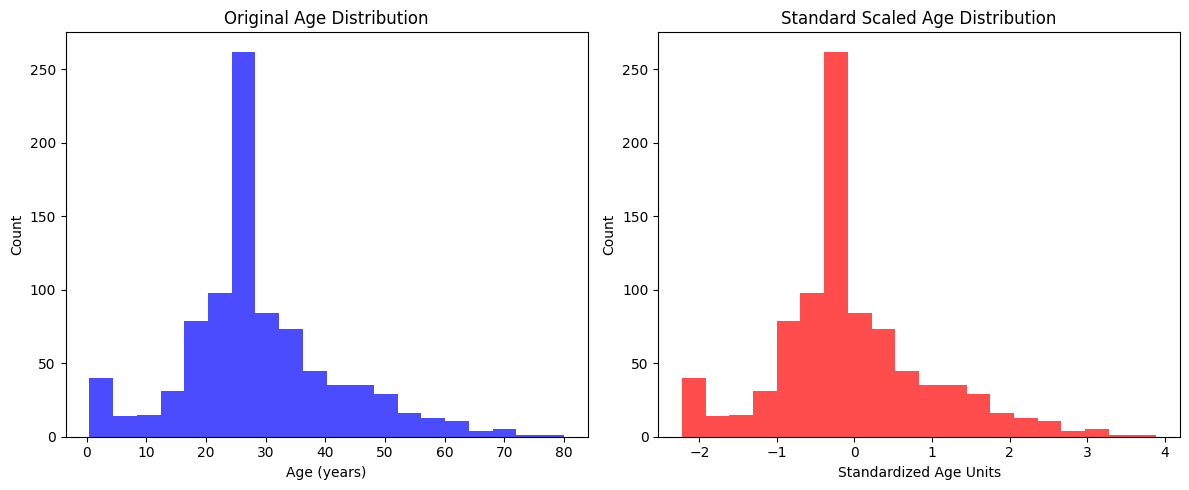

'\nINTERPRETATION:\nThe scaling maintains the distribution shape but changes the units\n- Left: Original age values in years\n- Right: Standard deviations from the mean age\n'

In [7]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as pltS

# ======================================================================
# 1. DATA LOADING AND INITIAL INSPECTION
# ======================================================================
print("STEP 1: DATA LOADING AND INSPECTION".center(70, '='))

# Load the Titanic dataset from a public URL
# Note: This dataset contains information about passengers and their survival
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
data = pd.read_csv(url)

# Display basic dataset information
print("\nOriginal Data (First 5 Rows):")
print(data.head())  # Shows column names and sample values

# Check for missing values - crucial for data quality assessment
print("\nMissing Values Summary:")
print(data.isnull().sum())  # Counts nulls per column

"""
KEY OBSERVATIONS:
- 'age' has missing values (continuous numerical feature)
- 'embarked' has few missing values (categorical feature)
- 'cabin' has many missing values (will be dropped)
"""

# ======================================================================
# 2. MISSING VALUE HANDLING
# ======================================================================
print("\nSTEP 2: MISSING VALUE IMPUTATION".center(70, '='))

# Strategy for numerical features (age, fare): Median imputation
# Why median? Robust to outliers compared to mean
imputer = SimpleImputer(strategy='median')
data[['age', 'fare']] = imputer.fit_transform(data[['age', 'fare']])

# Strategy for categorical feature (embarked): Mode imputation
# Why mode? Most frequent value is sensible for categories
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

# Dropping columns:
# - 'cabin' has too many missing values (>70%)
# - 'embark_town' is redundant with 'embarked'
data.drop(['cabin', 'embark_town'], axis=1, inplace=True, errors='ignore')

print("\nAfter Missing Value Handling:")
print(data.isnull().sum())  # Verify no missing values remain

# ======================================================================
# 3. CATEGORICAL VARIABLE ENCODING
# ======================================================================
print("\nSTEP 3: CATEGORICAL ENCODING".center(70, '='))

"""
WHY ONE-HOT ENCODING?
- Convert categorical text data to numerical format
- 'drop="first"' removes one column to avoid dummy variable trap
- 'sparse_output=False' returns array instead of sparse matrix
"""
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(data[['sex', 'embarked']])

# Get automatically generated column names
encoded_df = pd.DataFrame(encoded_features, 
                         columns=encoder.get_feature_names_out(['sex', 'embarked']))

print("\nEncoded Features:")
print(encoded_df.head())

# ======================================================================
# 4. FEATURE SCALING
# ======================================================================
print("\nSTEP 4: FEATURE SCALING".center(70, '='))

"""
WHY STANDARD SCALER?
- Transforms features to have mean=0 and std=1
- Important for distance-based algorithms (KNN, SVM, PCA)
- Helps models converge faster (neural networks, logistic regression)
"""
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['age', 'fare']])
scaled_df = pd.DataFrame(scaled_features, columns=['age_scaled', 'fare_scaled'])

print("\nScaled Features Description:")
print(scaled_df.describe())  # Show mean≈0 and std≈1

# ======================================================================
# 5. FEATURE CREATION
# ======================================================================
print("\nSTEP 5: FEATURE CREATION".center(70, '='))

# Create family_size by combining siblings/spouses + parents/children
# Adding 1 to include the passenger themselves
data['family_size'] = data['sibsp'] + data['parch'] + 1

# Create is_alone flag (boolean converted to 0/1)
data['is_alone'] = (data['family_size'] == 1).astype(int)

print("\nNew Features Sample:")
print(data[['sibsp', 'parch', 'family_size', 'is_alone']].head())

# ======================================================================
# 6. FINAL DATASET ASSEMBLY
# ======================================================================
print("\nSTEP 6: FINAL DATASET".center(70, '='))

# Combine all processed features
final_data = pd.concat([
    data[['pclass', 'family_size', 'is_alone']],  # Original numeric features
    encoded_df,                                   # Encoded categoricals
    scaled_df,                                    # Scaled numeric features
    data['survived']                              # Target variable
], axis=1)

print("\nFinal Processed Data (First 5 Rows):")
print(final_data.head())

# ======================================================================
# 7. VISUALIZATION
# ======================================================================
print("\nSTEP 7: VISUALIZATION".center(70, '='))

plt.figure(figsize=(12, 5))

# Original vs Scaled Age Distribution
plt.subplot(1, 2, 1)
plt.hist(data['age'], bins=20, color='blue', alpha=0.7)
plt.title('Original Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(final_data['age_scaled'], bins=20, color='red', alpha=0.7)
plt.title('Standard Scaled Age Distribution')
plt.xlabel('Standardized Age Units')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

"""
INTERPRETATION:
The scaling maintains the distribution shape but changes the units
- Left: Original age values in years
- Right: Standard deviations from the mean age
"""



## Program 2: Dimensionality Reduction



Demonstrate the two fundamental dimensionality reduction techniques:
1. Principal Component Analysis (PCA) - Linear method
2. t-Distributed Stochastic Neighbor Embedding (t-SNE) - Nonlinear method

Demonstrate the following:
- Data standardization requirements
- Variance explanation in PCA
- Perplexity in t-SNE
- Visualization of high-D data


====================STEP 1: DATA LOADING AND PREP=====================

Dataset Shape: (178, 13)
Feature Names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target Classes: ['class_0' 'class_1' 'class_2']
STEP 2: PRINCIPAL COMPONENT ANALYSIS=================

Explained Variance Ratio: [0.36198848 0.1920749 ]
Total Explained Variance: 0.55
STEP 3: t-SNE DIMENSIONALITY REDUCTION================
STEP 4: VISUALIZATION========================


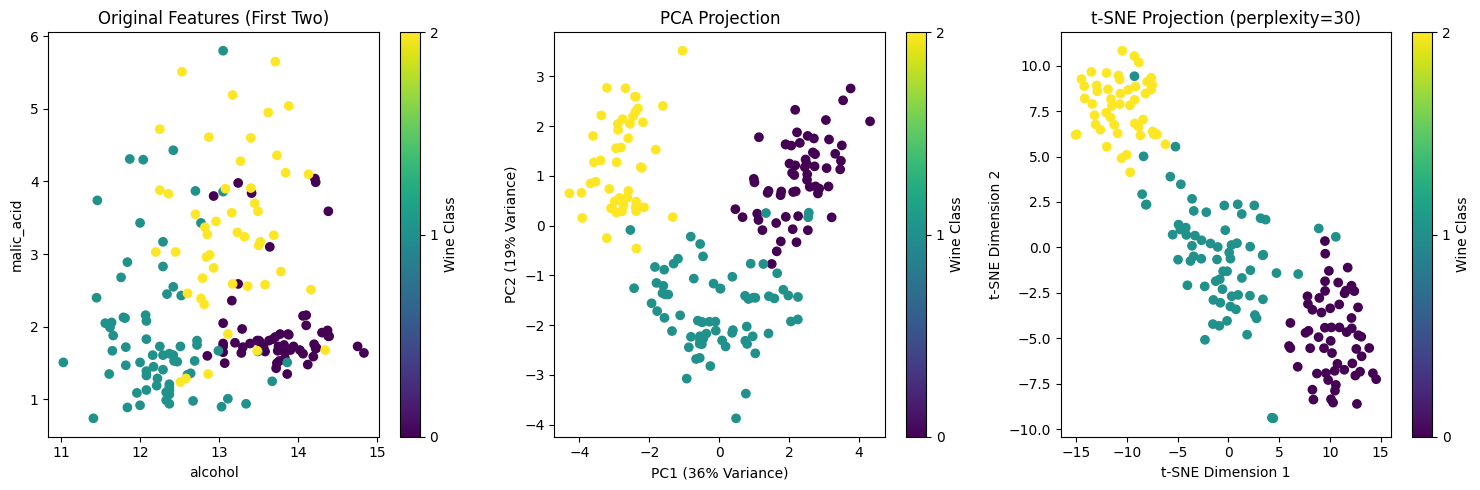

STEP 5: PCA VARIANCE ANALYSIS====================


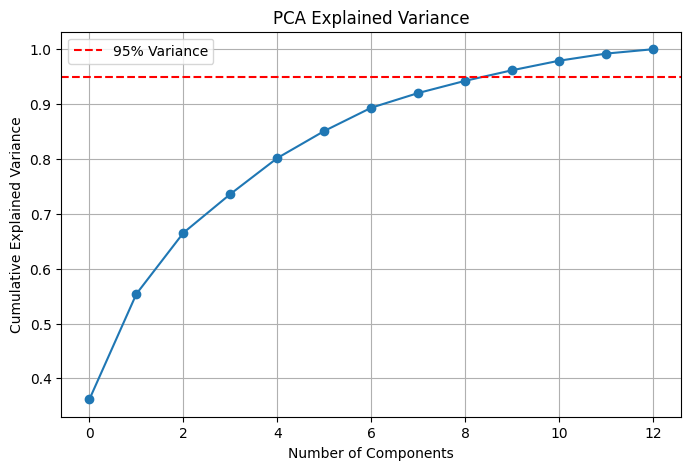


Components needed for 95% variance: 10


'\nKEY INSIGHTS:\n1. PCA provides a linear projection that maximizes variance\n2. t-SNE reveals nonlinear patterns and clusters\n3. First two original features show poor separation\n4. About 8 components needed to capture 95% variance\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ======================================================================
# 1. DATA LOADING AND PREPARATION
# ======================================================================
print("STEP 1: DATA LOADING AND PREP".center(70, '='))

# Load Wine Recognition dataset - 13 chemical measurements of 3 wine types
wine = load_wine()
X = wine.data       # Features (178 samples × 13 features)
y = wine.target     # Target classes (3 wine cultivars)
feature_names = wine.feature_names

print(f"\nDataset Shape: {X.shape}")
print(f"Feature Names:\n{feature_names}")
print(f"\nTarget Classes: {wine.target_names}")

# Standardize the data - CRUCIAL for PCA
"""
WHY STANDARDIZE?
- PCA is sensitive to feature scales
- Variables with larger ranges would dominate
- We want each feature to contribute equally
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ======================================================================
# 2. PRINCIPAL COMPONENT ANALYSIS (PCA)
# ======================================================================
print("\nSTEP 2: PRINCIPAL COMPONENT ANALYSIS".center(70, '='))

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nExplained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.2f}")

"""
INTERPRETATION:
- PC1 explains 36% of variance
- PC2 explains 19% of variance
- Together they capture 55% of total variance
"""

# ======================================================================
# 3. T-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING (t-SNE)
# ======================================================================
print("\nSTEP 3: t-SNE DIMENSIONALITY REDUCTION".center(70, '='))

"""
t-SNE PARAMETERS:
- perplexity: Balances local/global structure (typically 5-50)
- n_iter: Optimization iterations (default 1000)
- random_state: For reproducibility
"""
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# ======================================================================
# 4. VISUALIZATION COMPARISON
# ======================================================================
print("\nSTEP 4: VISUALIZATION".center(70, '='))

plt.figure(figsize=(15, 5))

# Original First Two Features
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel(feature_names[0])  # Alcohol
plt.ylabel(feature_names[1])  # Malic acid
plt.title("Original Features (First Two)")
plt.colorbar(ticks=[0, 1, 2], label='Wine Class')

# PCA Projection
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1 (36% Variance)')
plt.ylabel('PC2 (19% Variance)')
plt.title("PCA Projection")
plt.colorbar(ticks=[0, 1, 2], label='Wine Class')

# t-SNE Projection
plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title("t-SNE Projection (perplexity=30)")
plt.colorbar(ticks=[0, 1, 2], label='Wine Class')

plt.tight_layout()
plt.show()

# ======================================================================
# 5. PCA VARIANCE ANALYSIS
# ======================================================================
print("\nSTEP 5: PCA VARIANCE ANALYSIS".center(70, '='))

# Fit PCA with all components to analyze variance
pca_full = PCA().fit(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), 'o-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.legend()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1
print(f"\nComponents needed for 95% variance: {n_components_95}")

"""
KEY INSIGHTS:
1. PCA provides a linear projection that maximizes variance
2. t-SNE reveals nonlinear patterns and clusters
3. First two original features show poor separation
4. About 8 components needed to capture 95% variance
"""



## Program 3: Feature Selection 

Compares the three approaches to feature selection:

1. Filter Methods (Mutual Information) - Fast, model-agnostic
2. Wrapper Methods (RFE) - Uses model performance
3. Embedded Methods (L1 Regularization) - Built into model training

(Each method has different computational costs and suitability scenarios.)

====================STEP 1: DATA LOADING AND PREP=====================

Dataset Shape: (569, 30)
Target Classes:
Malignant: 212
Benign: 357

Applying Mutual Information...

Applying Recursive Feature Elimination...

Applying L1 Regularization...
STEP 3: MODEL EVALUATION=======================

Performance Comparison:
All Features:
- Features: 30
- Accuracy: 0.974
--------------------------------------------------
Mutual Information:
- Features: 5
- Accuracy: 0.974
--------------------------------------------------
RFE:
- Features: 5
- Accuracy: 0.974
--------------------------------------------------
L1 Regularization:
- Features: 14
- Accuracy: 0.965
--------------------------------------------------
STEP 4: FEATURE IMPORTANCE VISUALIZATION===============


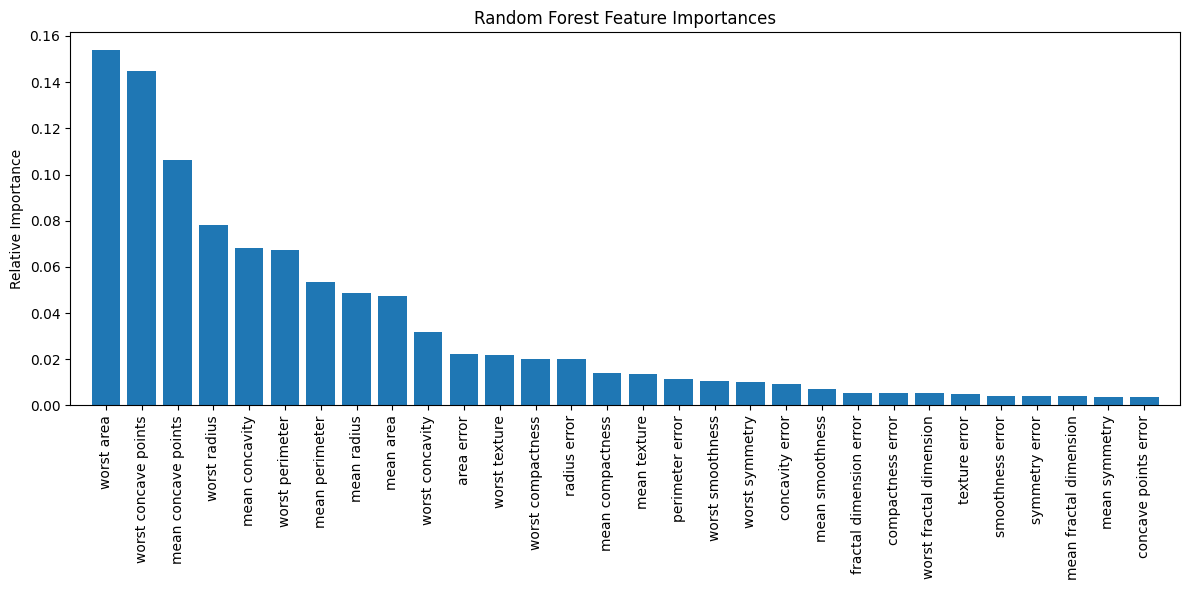

STEP 5: METHOD COMPARISON======================

Feature Selection Agreement:
                         Mutual Information  RFE  L1  RF Top5
mean radius                               0    0   0        0
mean texture                              0    0   0        0
mean perimeter                            0    0   0        0
mean area                                 0    0   0        0
mean smoothness                           0    0   0        0
mean compactness                          0    0   0        0
mean concavity                            0    0   0        1
mean concave points                       1    0   1        1
mean symmetry                             0    0   1        0
mean fractal dimension                    0    0   0        0
radius error                              0    1   1        0
texture error                             0    0   1        0
perimeter error                           0    0   0        0
area error                                0    0   0  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import (SelectKBest, mutual_info_classif,
                                     RFE, SelectFromModel)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ======================================================================
# 1. DATA LOADING AND PREPARATION
# ======================================================================
print("STEP 1: DATA LOADING AND PREP".center(70, '='))

# Load Breast Cancer Wisconsin dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

print(f"\nDataset Shape: {X.shape}")
print(f"Target Classes:\nMalignant: {sum(y==0)}\nBenign: {sum(y==1)}")

# Split into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize data - important for regularized models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================================================
# 2. FEATURE SELECTION METHODS
# ======================================================================

def apply_feature_selection(method_name, selector, X_train, X_test):
    """Helper function to apply feature selection consistently"""
    # Fit to training data
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Transform test data using the same selector
    X_test_selected = selector.transform(X_test)
    
    # Get selected feature names
    if hasattr(selector, 'get_support'):
        selected_features = feature_names[selector.get_support()]
    elif hasattr(selector, 'estimator_'):  # For SelectFromModel
        selected_features = feature_names[selector.estimator_.coef_.ravel() != 0]
    
    return X_train_selected, X_test_selected, selected_features

# Mutual Information
print("\nApplying Mutual Information...")
selector_mi = SelectKBest(mutual_info_classif, k=5)
X_train_mi, X_test_mi, features_mi = apply_feature_selection(
    "Mutual Information", selector_mi, X_train_scaled, X_test_scaled)

# Recursive Feature Elimination
print("\nApplying Recursive Feature Elimination...")
model_rfe = LogisticRegression(max_iter=10000, random_state=42)
selector_rfe = RFE(model_rfe, n_features_to_select=5, step=1)
X_train_rfe, X_test_rfe, features_rfe = apply_feature_selection(
    "RFE", selector_rfe, X_train_scaled, X_test_scaled)

# L1 Regularization
print("\nApplying L1 Regularization...")
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', 
                            max_iter=10000, random_state=42)
selector_l1 = SelectFromModel(model_l1)
X_train_l1, X_test_l1, features_l1 = apply_feature_selection(
    "L1", selector_l1, X_train_scaled, X_test_scaled)

# ======================================================================
# 3. MODEL EVALUATION
# ======================================================================
print("\nSTEP 3: MODEL EVALUATION".center(70, '='))

def evaluate_model(X_train, X_test, method_name):
    """Train and evaluate logistic regression with selected features"""
    model = LogisticRegression(max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    
    # Ensure test data has same number of features
    assert X_train.shape[1] == X_test.shape[1], \
        f"Feature mismatch: train {X_train.shape[1]} vs test {X_test.shape[1]}"
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{method_name}:")
    print(f"- Features: {X_train.shape[1]}")
    print(f"- Accuracy: {accuracy:.3f}")
    print("-"*50)

print("\nPerformance Comparison:")
evaluate_model(X_train_scaled, X_test_scaled, "All Features")
evaluate_model(X_train_mi, X_test_mi, "Mutual Information")
evaluate_model(X_train_rfe, X_test_rfe, "RFE")
evaluate_model(X_train_l1, X_test_l1, "L1 Regularization")

# ======================================================================
# 4. FEATURE IMPORTANCE VISUALIZATION
# ======================================================================
print("\nSTEP 4: FEATURE IMPORTANCE VISUALIZATION".center(70, '='))

# Random Forest for comparison
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Get importances and sort
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("Relative Importance")
plt.tight_layout()
plt.show()

# ======================================================================
# 5. METHOD COMPARISON
# ======================================================================
print("\nSTEP 5: METHOD COMPARISON".center(70, '='))

# Create comparison table
methods = {
    "Mutual Information": set(features_mi),
    "RFE": set(features_rfe),
    "L1": set(features_l1),
    "RF Top5": set(feature_names[indices][:5])
}

# Print agreement between methods
print("\nFeature Selection Agreement:")
comparison = pd.DataFrame(index=feature_names)
for method, features in methods.items():
    comparison[method] = [feature in features for feature in feature_names]

print(comparison.astype(int))

# Calculate overlaps
print("\nPairwise Method Agreements:")
for name1 in methods:
    for name2 in methods:
        if name1 < name2:  # Avoid duplicate comparisons
            overlap = len(methods[name1] & methods[name2])
            print(f"{name1} & {name2}: {overlap} common features")

